In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [3]:
data = pd.read_csv("/Users/darren/Downloads/cvproject/dataset/SampleSuperstore.csv")

In [4]:
data

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9988,Standard Class,Corporate,United States,Athens,Georgia,30605,South,Technology,Phones,206.1000,5,0.00,55.6470
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932


In [5]:
data.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [6]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000
mean,55186.627539,229.856670,3.789753,0.156218,28.652464
std,32063.103801,623.276273,2.225149,0.206456,234.271411
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728000
50%,56301.000000,54.480000,3.000000,0.200000,8.662000
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [8]:
ship_mode = data.groupby("Ship Mode")["Ship Mode"].count()
ship_mode

Ship Mode
First Class       1538
Same Day           543
Second Class      1944
Standard Class    5968
Name: Ship Mode, dtype: int64

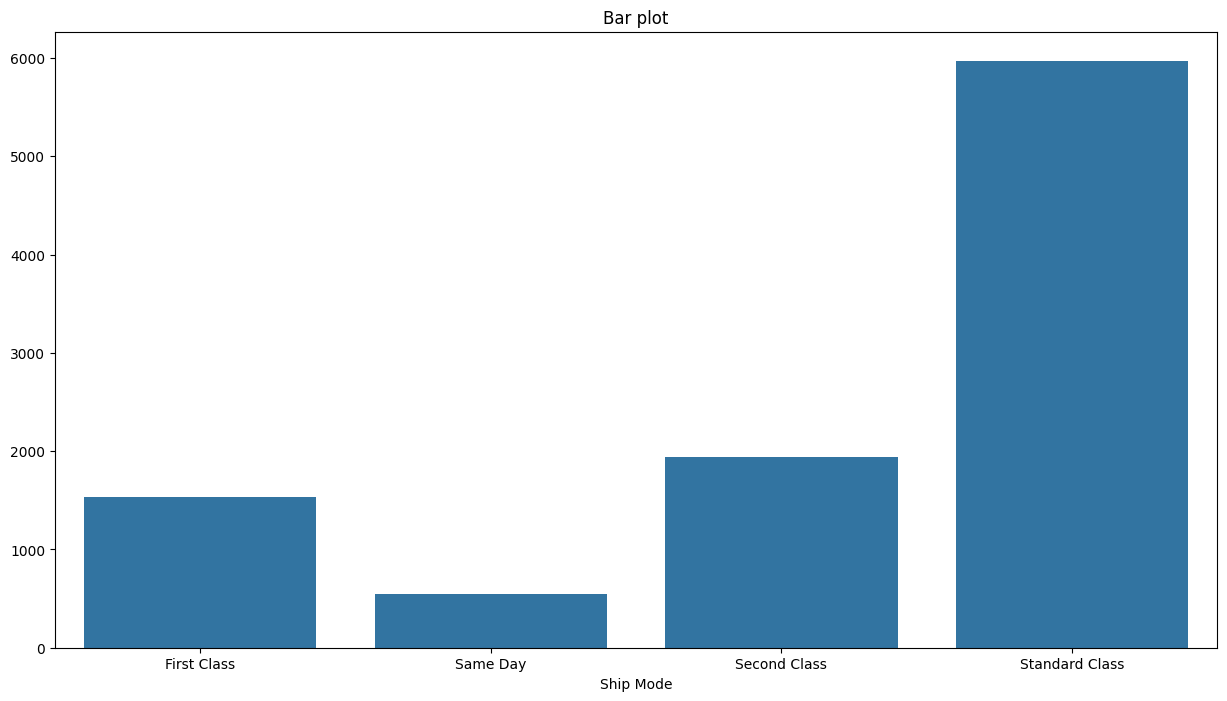

In [9]:
plt.figure(figsize=(15,8))
sns.barplot(x = ship_mode.index, y = ship_mode.values)
plt.title('Bar plot')

plt.show()

Ship Mode yang paling banyak digunakan adalah "Standard Class"

In [10]:
data["Total Sales"] = data["Quantity"] * data["Sales"]

In [11]:
data["Total Sales"]

0        523.9200
1       2195.8200
2         29.2400
3       4787.8875
4         44.7360
          ...    
9988    1030.5000
9989      75.7440
9990     183.9200
9991     517.1520
9992     118.4000
Name: Total Sales, Length: 9993, dtype: float64

In [12]:
total_sales = data.groupby("Region")["Total Sales"].sum()


In [13]:
total_sales

Region
Central    2.475833e+06
East       3.379326e+06
South      2.037675e+06
West       3.594741e+06
Name: Total Sales, dtype: float64

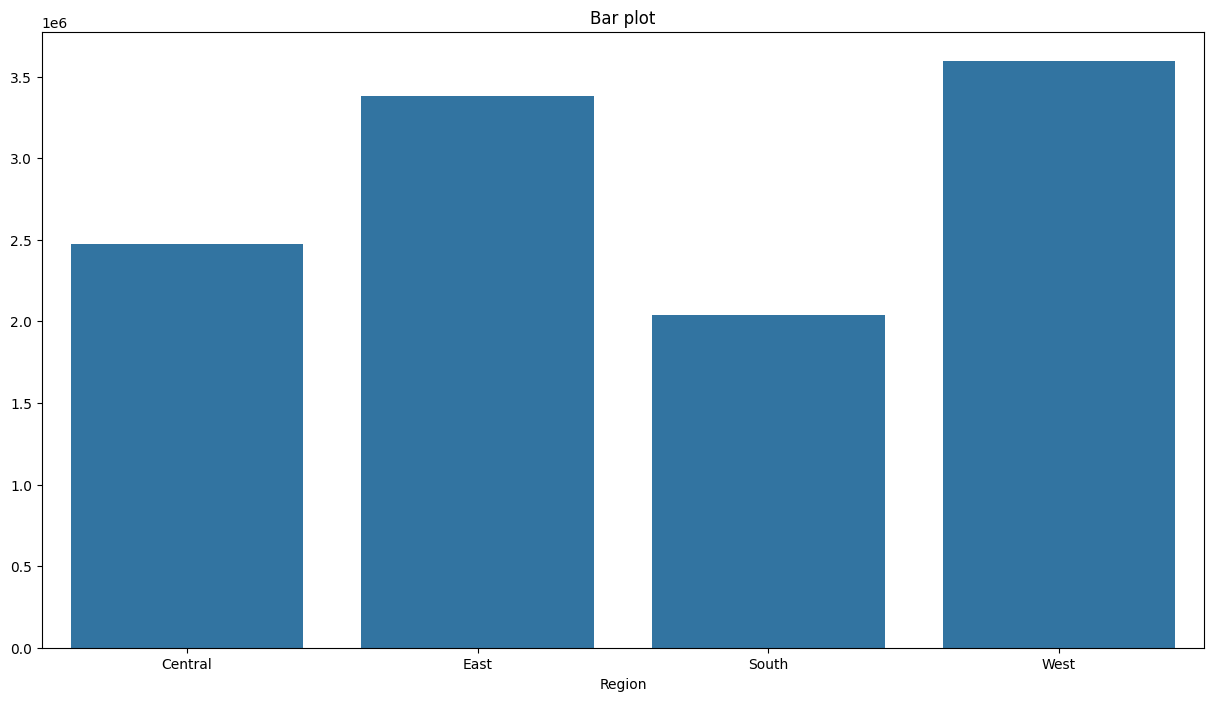

In [14]:
plt.figure(figsize=(15,8))
sns.barplot(x = total_sales.index, y = total_sales.values)
plt.title('Bar plot')

plt.show()

Region yang memiliki penjualan teringgi adalah region West

In [15]:
sales_profit = data.groupby("Category")[["Sales", "Profit"]].sum()


In [16]:
sales_profit

,Sales,Profit
Category,,
Furniture,741999.7953,18451.2728
Office Supplies,718803.8720,122417.8528
Technology,836154.0330,145454.9481


In [17]:
sales_profit.values[0:,0]

array([741999.7953, 718803.872 , 836154.033 ])

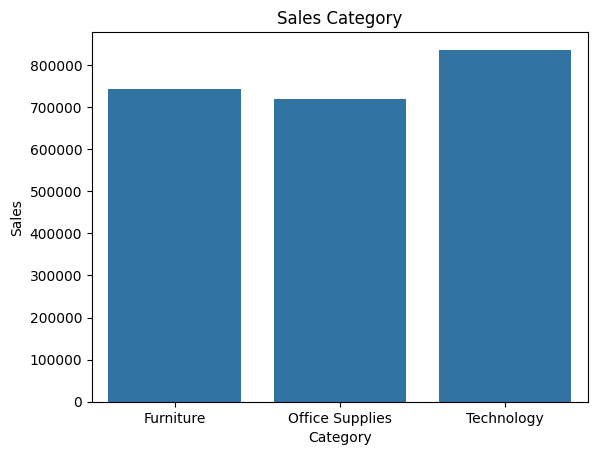

In [18]:
sns.barplot(x = sales_profit.index, y = sales_profit.values[0:,0])

plt.title("Sales Category")
plt.ylabel("Sales")
plt.show()

Sales tertinggi adalah technology dan sales terendah adalah furniture

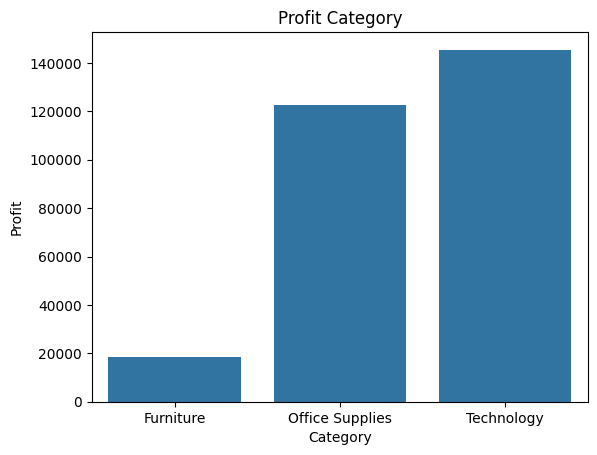

In [19]:
sns.barplot(x = sales_profit.index, y = sales_profit.values[0:,1])

plt.title("Profit Category")
plt.ylabel("Profit")
plt.show()


Profit tertinggi adalah Technology dan profit terendah adalah Furniture

In [20]:
discount = data.groupby("Discount")["Profit"].sum()
discount

Discount
0.00    320914.6552
0.10      9029.1770
0.15      1418.9915
0.20     90337.3060
0.30    -10369.2774
0.32     -2391.1377
0.40    -23057.0504
0.45     -2493.1111
0.50    -20506.4281
0.60     -5944.6552
0.70    -40075.3569
0.80    -30539.0392
Name: Profit, dtype: float64

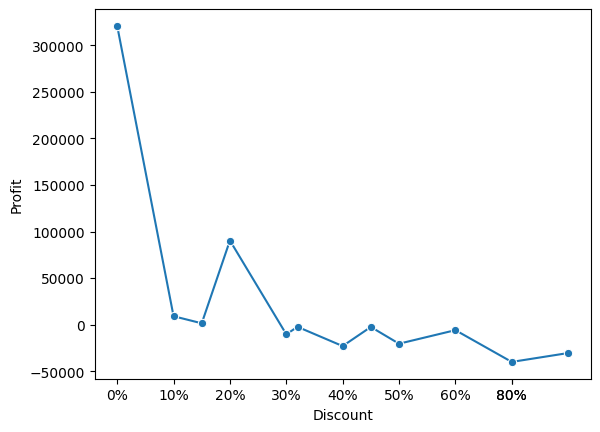

In [21]:
sns.lineplot(x = discount.index, y = discount.values, marker = "o")
plt.xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.7], labels= ["0%", "10%", "20%", "30%", "40%", "50%", "60%", "70%", "80%"])
plt.ylabel("Profit")
plt.show()

Semakin banyak discount semakin dikit profit